In [16]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [17]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

#### 01. 기본 그래프
pie 그래프는 제공되지 않음

##### 1) 선 그래프

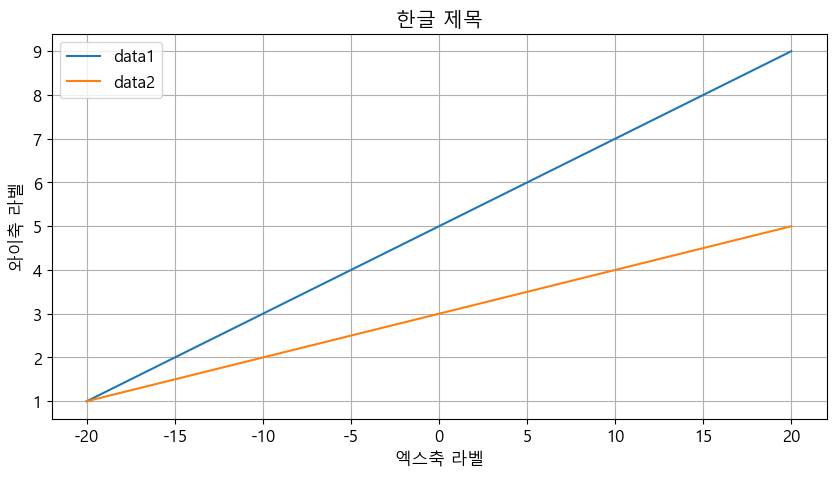

In [18]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20, -10, 0, 10, 20], y = [1, 3, 5, 7, 9], label = 'data1')
sb.lineplot(x=[-20, -10, 0, 10, 20], y = [1, 2, 3, 4, 5], label = 'data2')

# 그 밖의 옵션은 matlotlib과 동일
plt.title('한글 제목')        # 그래프 제목
plt.xlabel("엑스축 라벨")      # x축 제목
plt.ylabel("와이축 라벨")      # y축 제목
plt.legend()
plt.grid()
plt.show()                  # 그래프 화면 표시
plt.close()                 # 그래프 그리기 종료

##### 2) 세로 막대 그래프

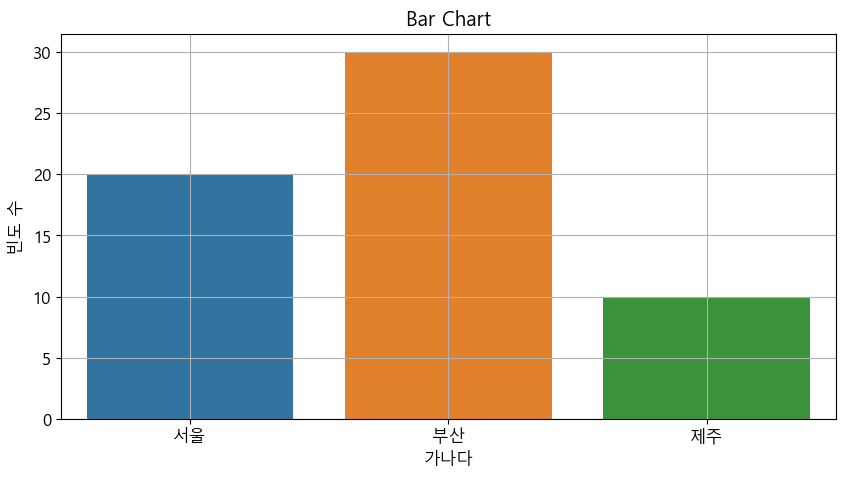

In [19]:
x = ["서울", "부산", "제주"]
y = [20, 30, 10]

sb.barplot(x=x, y=y)

plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

##### 3) 가로 막대 그래프
기본 제공 팔레트
x축과 y축을 바꿔섯 ㅓㄹ정
> deep, muted,pastel,bright, colorblind, Spectral

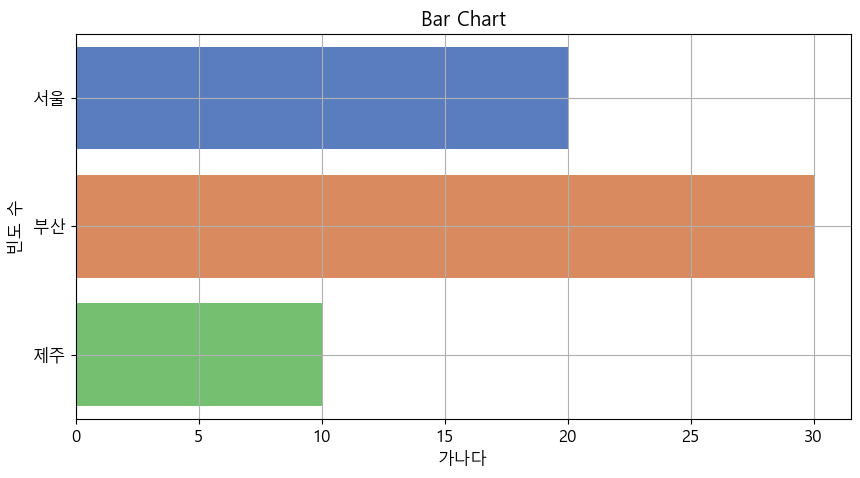

In [20]:
x= ['서울', '부산', '제주']
y = [20, 30, 10]

sb.barplot(x=y, y=x, label = 'data', palette= 'muted')

plt.grid()
plt.title("Bar Chart")
plt.xlabel('가나다')
plt.ylabel('빈도 수')
plt.show()
plt.close()

##### 4) 산점도 그래프

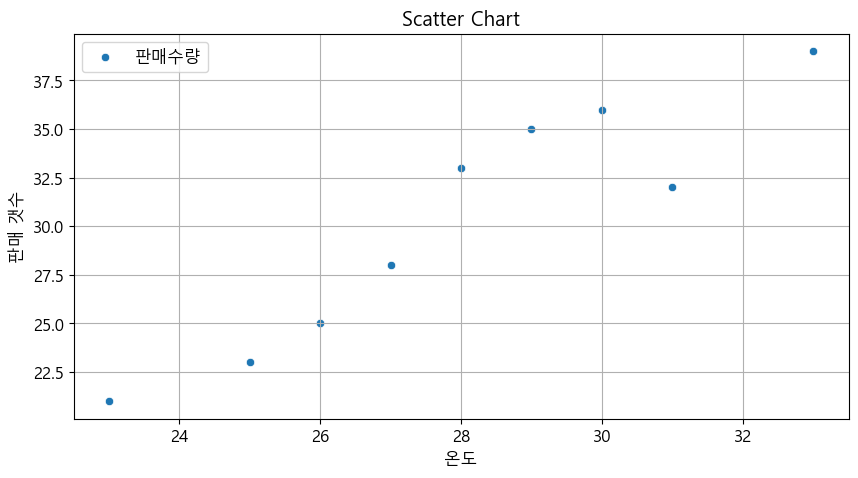

In [21]:
# 온도와 아이스크림 판매 수량
tmp = [ 23, 25, 26, 27, 28, 29, 30, 31, 33 ]
qty = [ 21, 23, 25, 28, 33, 35, 36, 32, 39 ]

sb.scatterplot(x=tmp, y=qty, label='판매수량')

plt.title("Scatter Chart")
plt.grid()
plt.xlabel("온도")
plt.ylabel("판매 갯수")
plt.show()
plt.close()

#### 03. 데이터 프레임을 통한 그래프
##### 1) 데이터 준비

In [22]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


##### 3) 막대 그래프

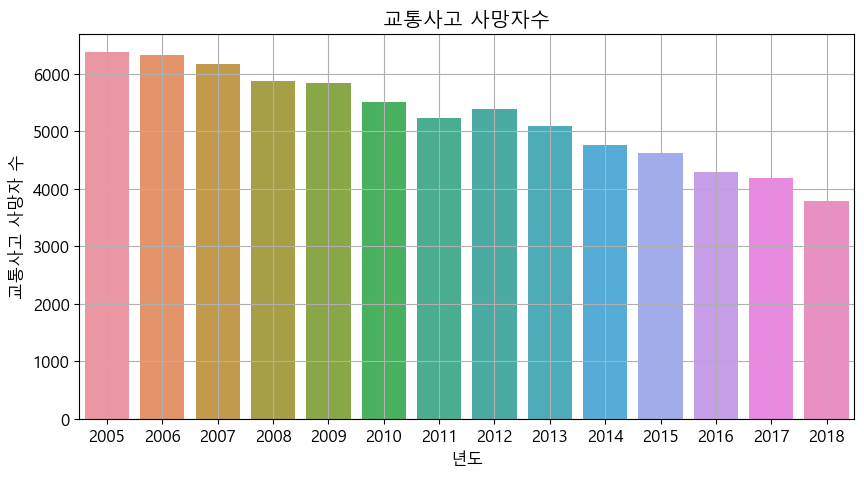

In [23]:
# 그래프 그리기 (서브 플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x= df.index, y= '사망자수')

plt.title('교통사고 사망자수')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고 사망자 수")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료


##### 4) 산점도 그래프

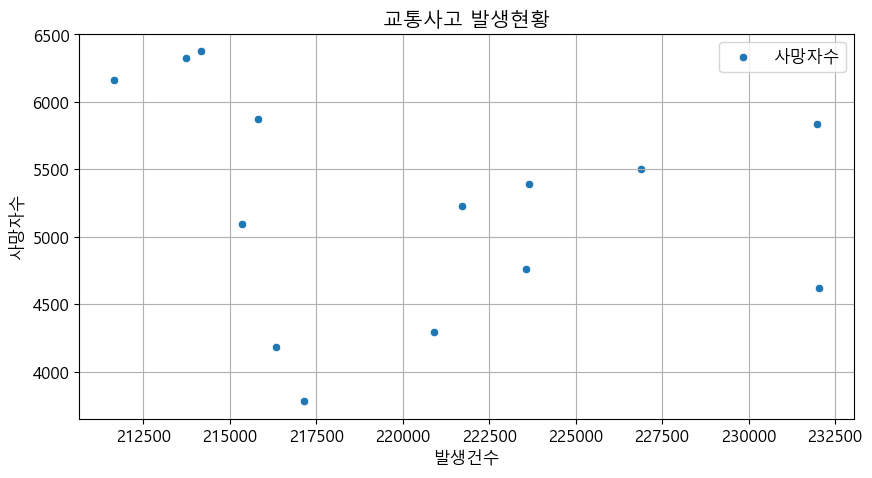

In [24]:
sb.scatterplot(data= df, x= '발생건수', y= '사망자수', label = '사망자수')

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")      # x축 제목
plt.ylabel("사망자수")   # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

##### 5) 추세선을 포함한 산점도 그래프
추세선 주변에 보이는 구간은 `95%` 신뢰구관임 <br>
`fit_reg=False`를 추가하면 추세선이 표시되지 않게 되어 scatterplot 매서드와 동일한 결과를 보여준다(기본값=True)<br>
`ci` 파라미터는 신뢰수즌을 설정하며 기본값은 `95`이다.<br>
`line_kws` 파라미터는 선의 색상, `scatter_kws`는 점의 색상<br>

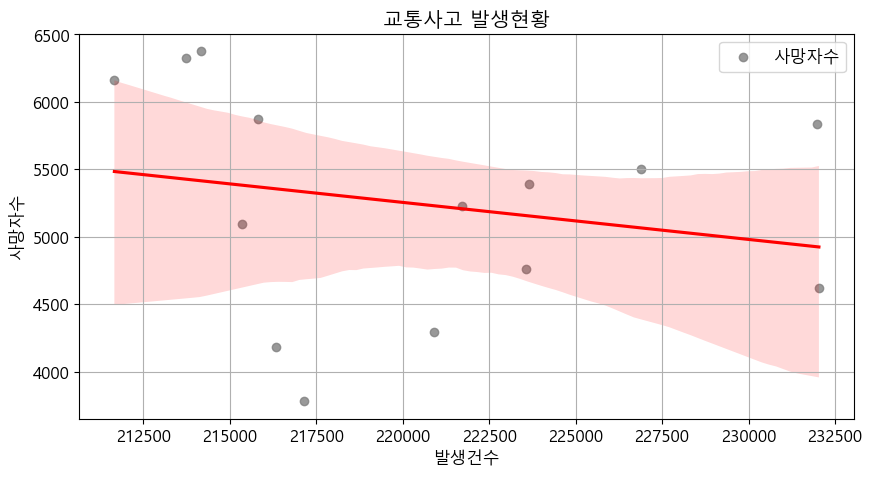

In [25]:
# 추세선을 함꼐 보여주는 산점도 그래프 그리기
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수',
           line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")          # x축 제목
plt.ylabel("사망자수")          # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

##### 5) 서브플롯에 기반한 선 그래프
> 서브 플롯을 사용하지 않을 경우 `sb.lineplot()` 함수에서 `ax` 파라미터 제거

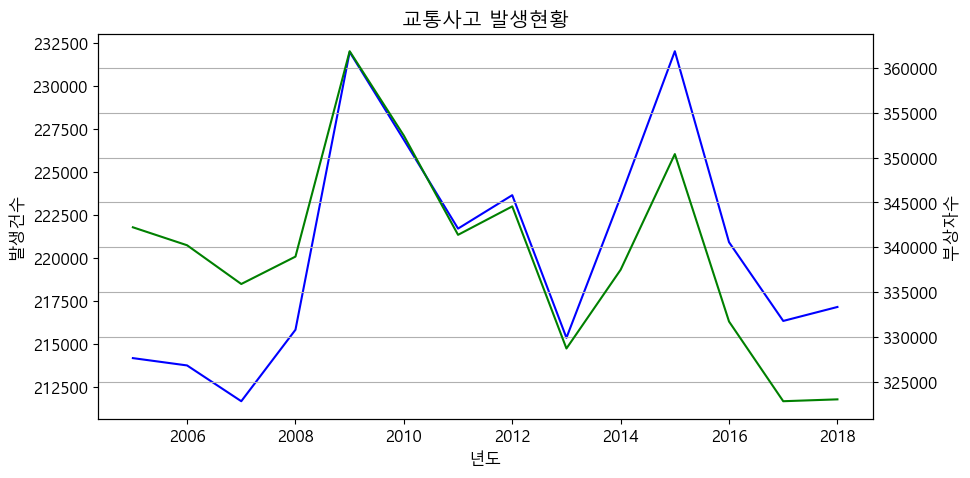

In [27]:
fig, ax1 = plt.subplots(1,1)
ax2= ax1.twinx()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(data=df, x=df.index, y = '발생건수', color = 'blue', ax=ax1)
sb.lineplot(data=df, x=df.index, y = '부상자수', color = 'green', ax=ax2)

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료